## Tasca M6 T01

### Exercici 1
***
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [5]:
df = pd.read_csv('housing data.csv', header=None)

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX','PRATIO', 'B', 'LSTAT', 'MEDV']

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Recordem quins eren els atributs d'aquest dataset:

- **CRIM**: Taxa de criminalitat per càpita per ciutat.
- **ZN**: Proporció de terreny residencial zonificat per terrenys de més de 25.000 peus quadrats.
- **INDUS**: Proporció d'acres de negocis no minoristes per ciutat.
- **CHAS**: Variable fictícia del riu Charles (= 1 si l'àrea limita amb el riu; 0 en cas contrari).
- **NOX**: Concentració d'òxids nítrics (parts per 10 milions).
- **RM**: Nombre mitjà d'habitacions per habitatge.
- **AGE**: Proporció d'unitats ocupades pel propietari construïdes abans de 1940.
- **DIS**: Distàncies ponderades a cinc centres d'ocupació a Boston.
- **RAD**: Índex d'accessibilitat a carreteres radials.
- **TAX**: Taxa d'impostos a la propietat de valor total per 10.000 dòlars.
- **PTRATIO**: Relació (ratio) alumne-mestre per ciutat.
- **B**: 1000(Bk - 0.63)^2 on Bk és la proporció de població negra per ciutat.
- **LSTAT**: % d'estatus més baix de la població.
- **MEDV**: Valor mitjà dels habitatges ocupats pel propietari en milers de dòlars ($1000).

A l'exercici anterior (https://github.com/paucco/SkLearn_Train_Test (Tasca M5 T02 - Sprint 5)) ja vam tractar i analitzar les dades, per tant, afegim aquí ràpidament els passos més importants.

In [6]:
# Anàlisi estadístic dels atributs

df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


<Axes: >

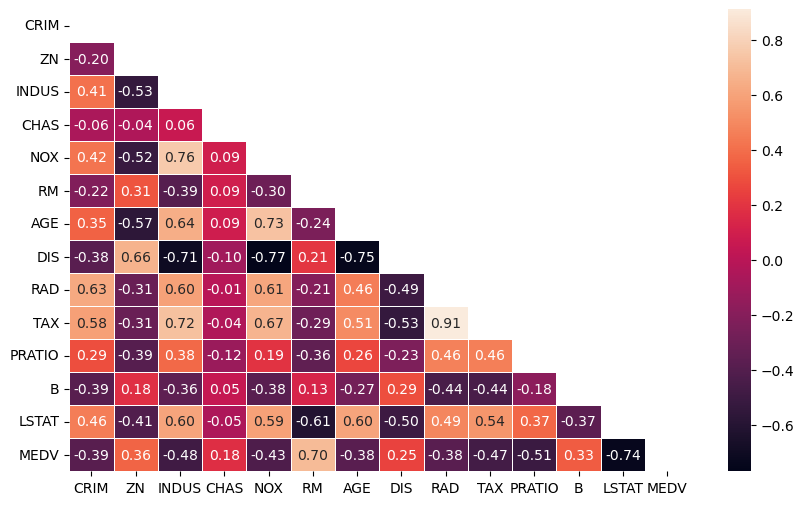

In [7]:
# Mapa de calor per veure la correlació entre variables

plt.figure(figsize=(10, 6))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=.5, mask=mask)

 Les correlacions més altes són les següents:

**1. RAD i TAX (0.91)**:

- RAD: Índex d'accessibilitat a carreteres radials.
- TAX: Taxa d'impostos a la propietat de valor total per 10.000 dòlars.

Com més accés a les autopistes radials, més valor a l'impost de la propietat.

**2. NOX i DIS (-0.77)**:

- NOX: Concentració d'òxids nítrics (parts per 10 milions).
- DIS: Distàncies ponderades a cinc centres d'ocupació a Boston.

Com més distància dels centres d'ocupació, menys concentració de NO2.

**3. AGE i DIS (-0.75)**:

- AGE: Proporció d'unitats ocupades pel propietari construïdes abans de 1940.
- DIS: Distàncies ponderades a cinc centres d'ocupació a Boston.

Com més distància dels centres d'ocupació, menys propietats antigues ocupades.

**4. INDUS i DIS (-0.71)**:

- INDUS: Proporció d'acres de negocis no minoristes per ciutat.
- DIS: Distàncies ponderades a cinc centres d'ocupació a Boston.

Com més distància dels centres d'ocupació, menys botigues i/o serveis.


La resta de correlacions entre variables són relativament baixes. 

Si ens fixem en l'atribut MEDV (la variable target) veiem que, en general, té una correlació bastant moderada amb les altres variables. Trobem les més altes en els següents casos:

**1. MEDV i LSTAT (-0.74)**:

- MEDV: Valor mitjà dels habitatges ocupats pel propietari en milers de dòlars ($1000).
- LSTAT: % d'estatus més baix de la població.

Com menys car és l'habitatge, més alt és el % de persones amb un estatus socioeconòmic més baix.

**2. MEDV i RM (0.70)**:

- MEDV: Valor mitjà dels habitatges ocupats pel propietari en milers de dòlars ($1000).
- RAD: Índex d'accessibilitat a carreteres radials.

Com més alt és el valor de l'habitatge, més accessibilitat a les carreteres radials.

<Axes: >

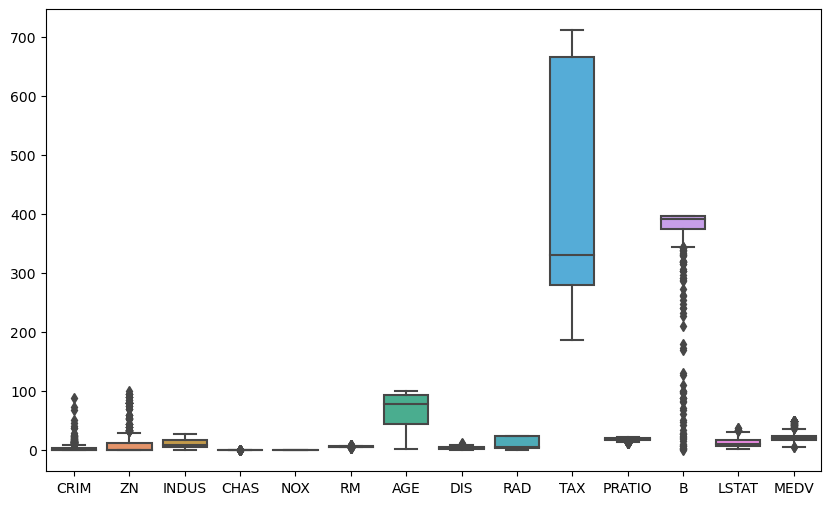

In [8]:
# Boxplot per veure els outliers

plt.figure(figsize=(10,6))
sns.boxplot(data=df)

- Variables amb outliers: 'CRIM', 'ZN', 'RM', 'DIS', 'PRATIO', 'B', 'LSTAT', 'MEDV' (variable target).
- Variables sense outliers: 'INDUS', 'NOX', 'AGE', 'TAX'.
- CHAS i RAD són categòriques.

Per estandarditzar utilitzem el següent:

- **Min-Max** per a distribucions desconegudes o que no segueixen una distribució normal (hem vist a l'exercici anterior que els atributs no tenen una distribució gaussiana), i quan no hi ha presència de outliers.
- **RobustScaler** per a distribucions no normals i presència de outliers.

A l'exercici anterior vam veure amb el Test de normalitat de Shapiro-Wilk que cap variable té una distribució normal.

In [33]:
# Estandardització

df2 = df

var_out = ['CRIM', 'ZN', 'RM', 'DIS', 'PRATIO', 'B', 'LSTAT']
df2[var_out] = RobustScaler().fit_transform(df2[var_out])


var_no_out = ['INDUS', 'NOX', 'AGE', 'TAX']
df2[var_no_out] = MinMaxScaler().fit_transform(df2[var_no_out])


df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,1,0.208015,-1.339286,0.261902,-0.637681,24.0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,2,0.104962,-0.446429,0.261902,-0.221889,21.6
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,2,0.104962,-0.446429,0.066675,-0.732634,34.7
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,3,0.066794,-0.125000,0.153016,-0.841579,33.4
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,3,0.066794,-0.125000,0.261902,-0.602699,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0,0.386831,0.521003,0.681771,-0.236007,1,0.164122,0.696429,0.026382,-0.168916,22.4
502,-0.058759,0.00,0.420455,0,0.386831,-0.119919,0.760041,-0.297887,1,0.164122,0.696429,0.261902,-0.227886,20.6
503,-0.054450,0.00,0.420455,0,0.386831,1.039973,0.907312,-0.336744,1,0.164122,0.696429,0.261902,-0.571714,23.9
504,-0.040867,0.00,0.420455,0,0.386831,0.793360,0.889804,-0.265053,1,0.164122,0.696429,0.096414,-0.487756,22.0


In [34]:
# Columna dummy per a l'atribut RAD

df2 = pd.get_dummies(df2, columns=['RAD'], drop_first=True)

df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PRATIO,...,LSTAT,MEDV,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,0.208015,-1.339286,...,-0.637681,24.0,0,0,0,0,0,0,0,0
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,0.104962,-0.446429,...,-0.221889,21.6,1,0,0,0,0,0,0,0
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,0.104962,-0.446429,...,-0.732634,34.7,1,0,0,0,0,0,0,0
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,0.066794,-0.125000,...,-0.841579,33.4,0,1,0,0,0,0,0,0
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,0.066794,-0.125000,...,-0.602699,36.2,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.420455,0,0.386831,0.521003,0.681771,-0.236007,0.164122,0.696429,...,-0.168916,22.4,0,0,0,0,0,0,0,0
502,-0.058759,0.00,0.420455,0,0.386831,-0.119919,0.760041,-0.297887,0.164122,0.696429,...,-0.227886,20.6,0,0,0,0,0,0,0,0
503,-0.054450,0.00,0.420455,0,0.386831,1.039973,0.907312,-0.336744,0.164122,0.696429,...,-0.571714,23.9,0,0,0,0,0,0,0,0
504,-0.040867,0.00,0.420455,0,0.386831,0.793360,0.889804,-0.265053,0.164122,0.696429,...,-0.487756,22.0,0,0,0,0,0,0,0,0


In [35]:
# Anàlisi estadístic del dataset estandarditzat i amb columna dummy

df2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.93,2.39,-0.07,-0.05,0.00,0.95,24.68
ZN,506.0,0.91,1.87,0.00,0.00,0.00,1.00,8.00
INDUS,506.0,0.39,0.25,0.00,0.17,0.34,0.65,1.00
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.0,0.35,0.24,0.00,0.13,0.31,0.49,1.00
RM,506.0,0.10,0.95,-3.59,-0.44,0.00,0.56,3.48
AGE,506.0,0.68,0.29,0.00,0.43,0.77,0.94,1.00
DIS,506.0,0.19,0.68,-0.67,-0.36,0.00,0.64,2.89
TAX,506.0,0.42,0.32,0.00,0.18,0.27,0.91,1.00
PRATIO,506.0,-0.21,0.77,-2.30,-0.59,0.00,0.41,1.05


### Regressió lineal

Fem l'split del TRAIN - TEST amb la variable MEDV

In [36]:
# Train-test

X = df2.drop('MEDV', axis=1)
y = df2['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PRATIO,B,LSTAT,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
192,-0.047251,3.60,0.109238,0,0.106996,1.313686,0.240989,1.059613,0.402672,-1.375000,-0.045569,-0.848576,0,0,0,1,0,0,0,0
138,-0.001866,0.00,0.785557,0,0.491770,-0.476287,0.981462,-0.498292,0.477099,0.767857,0.028780,0.995502,0,0,1,0,0,0,0,0
251,-0.011800,1.76,0.197947,0,0.094650,0.310976,0.061792,1.356513,0.272901,0.017857,-0.689291,-0.776612,0,0,0,0,0,1,0,0
13,0.103824,0.00,0.281525,0,0.314815,-0.351626,0.606591,0.485728,0.229008,0.696429,0.261902,-0.309845,0,0,1,0,0,0,0,0
256,-0.067073,7.20,0.120601,0,0.018519,1.687669,0.322348,1.013082,0.108779,-1.125000,-0.244634,-0.824588,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,4.605040,0.00,0.646628,0,0.648148,-1.262195,0.980433,-0.576815,0.914122,0.410714,0.261902,1.944028,0,0,0,0,0,0,0,1
197,-0.058372,6.40,0.038856,0,0.039095,1.217480,0.347065,1.328115,0.270992,-2.303571,-1.781029,-0.274863,1,0,0,0,0,0,0,0
439,2.540758,0.00,0.646628,0,0.730453,-0.787940,0.937178,-0.450174,0.914122,0.410714,0.261902,1.151424,0,0,0,0,0,0,0,1
174,-0.047855,0.00,0.131598,0,0.257202,-0.473577,0.677652,-0.163701,0.208015,-0.875000,0.085862,-0.171914,0,0,0,1,0,0,0,0


Creem el model de regressió lineal i fem les prediccions

In [13]:
# Creació del model de regressió lineal

model_lineal = LinearRegression()

model_lineal.fit(X_train, y_train) # Entrenar el model

y_pred_ml = model_lineal.predict(X_test) # Prediccions

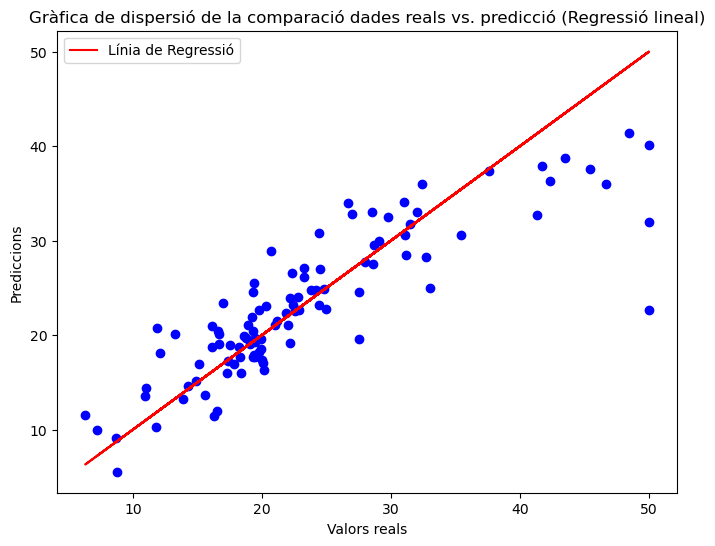

In [14]:
# Visualització del model

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_ml, color='blue')
plt.plot(y_test, y_test, color='red', label='Línia de Regressió')
plt.xlabel('Valors reals')
plt.ylabel('Prediccions')
plt.title('Gràfica de dispersió de la comparació dades reals vs. predicció (Regressió lineal)')
plt.legend()

En aquest gràfic tenim les dades reals (y_test) en l'eix X i els valors de la predicció (y_pred_ml) en l'eix Y (són els punts blaus). La línia de regressió (vermella) són els valors reals de y_test. Com més a prop estiguin els punts blaus a la línia vermella, més precisa és la predicció. En l'scatterplot podem veure que el model s'ajusta relativament bé, tot i que hi ha alguns outliers.

### Regressió Lasso

La regressió Lasso minimitza l'impacte de les variables amb poca correlació i els outliers. Això pot ajudar a evitar l'overfitting i facilita la simplicació del model.

In [15]:
# Creació del model de regressió Lasso

model_lasso = Lasso(alpha=0.5)

model_lasso.fit(X_train, y_train) # Entrenar el model

y_pred_lasso = model_lasso.predict(X_test) # Prediccions

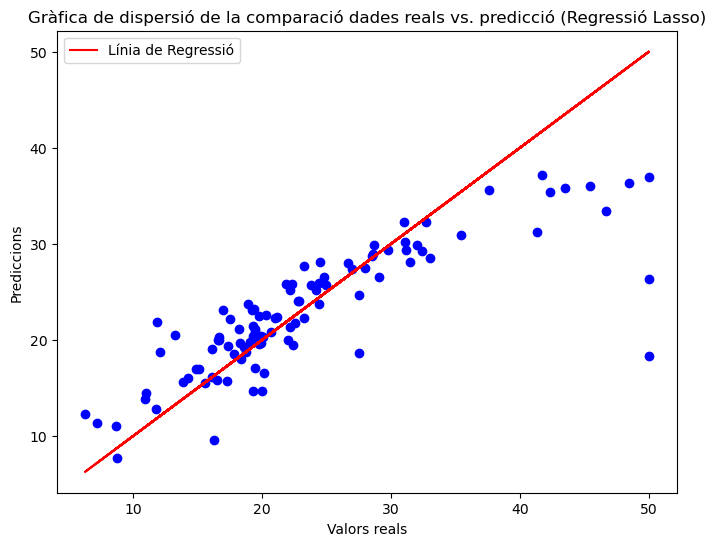

In [16]:
# Visualització del model

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_lasso, color='blue')
plt.plot(y_test, y_test, color='red', label='Línia de Regressió')
plt.xlabel('Valors reals')
plt.ylabel('Prediccions')
plt.title('Gràfica de dispersió de la comparació dades reals vs. predicció (Regressió Lasso)')
plt.legend()

Igual que en l'anterior gràfic, tenim les dades reals (y_test) en l'eix X i els valors de la predicció (y_pred_lasso) en l'eix Y (són els punts blaus). La línia de regressió (vermella) són els valors reals de y_test. Com podem observar, en aquest cas, sembla que els punts blaus s'apropen més a la línia de regressió, per tant, en principi, podríem dir que aquest model proporciona millors resultats en termes de precisió (tot i que continuen havent-hi alguns outliers).

Text(0.5, 1.0, 'Gràfica de dispersió Regressió Lasso')

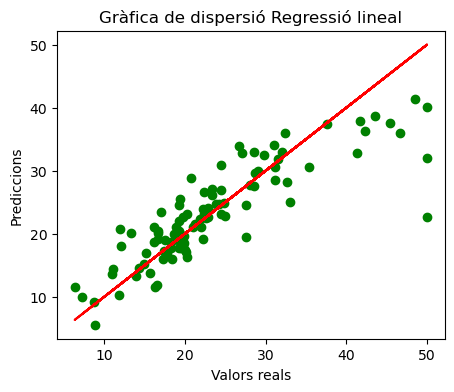

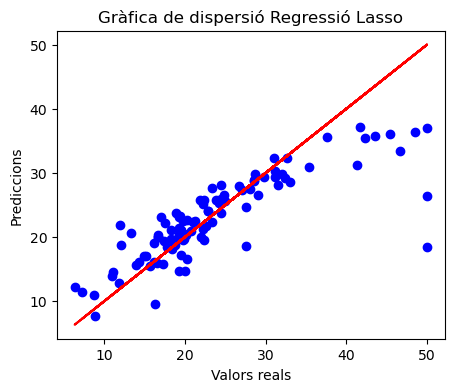

In [17]:
# Regressió lineal

plt.figure(figsize=(5, 4))

plt.scatter(y_test, y_pred_ml, color='green')
plt.plot(y_test, y_test, color='red', label='Línia de Regressió')
plt.xlabel('Valors reals')
plt.ylabel('Prediccions')
plt.title('Gràfica de dispersió Regressió lineal')


# Regressió Lasso

plt.figure(figsize=(5, 4))

plt.scatter(y_test, y_pred_lasso, color='blue')
plt.plot(y_test, y_test, color='red', label='Línia de Regressió')
plt.xlabel('Valors reals')
plt.ylabel('Prediccions')
plt.title('Gràfica de dispersió Regressió Lasso')


Aquí podem veure ambdós gràfics junts per veure les diferències que hem comentat abans visualment.

### Exercici 2
***
Compara’ls en base al MSE i al R2.

- L'Error Quadràtic Mitjà (**MSE**) mesura la mitjana dels quadrats dels errors entre els valors predits pel model i els valors reals. En general, un **MSE** més baix indica un millor ajust del model a les dades, ja que implica que les prediccions del model estan més prop dels valors reals.

- El Coeficient de determinació (**R²**) és una mesura que indica la proporció de la variància en la variable dependent que és predictible a partir de les variables independents en el model. **R²** varia entre 0 i 1, per tant, un **R²** més pròxim a 1 indica un millor ajust del model.

In [37]:
# Avaluació del model de regressió lineal

mse = mean_squared_error(y_test, y_pred_ml).round(3)
r2 = r2_score(y_test, y_pred_ml).round(3)

print('Model de Regressió lineal')
print(f'MSE (Mean Squared Error): {mse}')
print(f'R²: {r2}')

Model de Regressió lineal
MSE (Mean Squared Error): 25.332
R²: 0.727


In [38]:
# Avaluació del model de regressió Lasso

mse_lasso = mean_squared_error(y_test, y_pred_lasso).round(3)
r2_lasso = r2_score(y_test, y_pred_lasso).round(3)

print('Model de Regressió Lasso')
print(f'MSE (Mean Squared Error):{mse_lasso}')
print(f'R²: {r2_lasso}')

Model de Regressió Lasso
MSE (Mean Squared Error):31.828
R²: 0.657


In [20]:
# Comparació de models

print(f'MSE: Lineal {mse} | Lasso {mse_lasso}')
print(f'R²:  Lineal {r2}  | Lasso {r2_lasso}')

MSE: Lineal 25.332 | Lasso 31.828
R²:  Lineal 0.727  | Lasso 0.657


El MSE per al model de regressió lineal és lleugerament més baix que el del model Lasso, és a dir, el model de regressió lineal sembla tenir un millor ajust (millor rendiment). El R² per al model de regressió lineal és de 0.727, indicant que al voltant del 72.7% de la variabilitat en la variable dependent és explicada pel model. Aquest valor és lleugerament superior al R² del model Lasso, la qual cosa suggereix que el model de regressió lineal té una capacitat de predicció lleugerament millor.

### Exercici 3
***
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

#### Model lineal

In [39]:
# Paràmetres del model lineal

model_lineal.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [22]:
# Definició de paràmetres del model lineal

param = {'fit_intercept': [True, False],
              'positive' : [True, False],
              'copy_X' : [True, False]}


# GridSearchCV
model_lr = LinearRegression()
grid_search = GridSearchCV(estimator=model_lr, param_grid=param, cv=5, scoring='neg_mean_squared_error')


# Entrenament del model amb les diferents combinacions de paràmetres
grid_search.fit(X_train, y_train)


# Trobar els millors paràmetres 
best_param = grid_search.best_params_


# Avaluar el model amb els millors paràmetres
best_model_lr = grid_search.best_estimator_
y_pred_best_model_lr = best_model_lr.predict(X_test)

mse_best_model_lr = mean_squared_error(y_test, y_pred_best_model_lr).round(3)
r2_best_model_lr = r2_score(y_test, y_pred_best_model_lr).round(3)


print ('Model de Regressió lineal')
print(f'Millors paràmetres: {best_param}')
print(f'MSE amb els millors paràmetres: {mse_best_model_lr}')
print(f'R² amb els millors paràmetres: {r2_best_model_lr}')

Model de Regressió lineal
Millors paràmetres: {'copy_X': True, 'fit_intercept': True, 'positive': False}
MSE amb els millors paràmetres: 25.332
R² amb els millors paràmetres: 0.727


In [23]:
# Comparació de les MSE i els R²

print(f'MSE: Lineal {mse} | Lineal amb els millors paràmetres {mse_best_model_lr}')
print(f'R²: Lineal {r2}   | Lineal amb els millors paràmetres {r2_best_model_lr}')

MSE: Lineal 25.332 | Lineal amb els millors paràmetres 25.332
R²: Lineal 0.727   | Lineal amb els millors paràmetres 0.727


En aquest cas, el MSE no ha canviat després de l'optimització dels paràmetres. Això podria suggerir que els paràmetres predeterminats ja eren apropiats o que la cerca no va trobar combinacions de paràmetres que milloressin significativament la precisió del model. Similar al MSE, el R² tampoc a canviat, indicant així que la capacitat explicativa del model no s'ha vist afectada significativament.

Els resultats indiquen que, en aquest cas específic, la cerca de paràmetres no ha tingut un impacte substancial en el rendiment del model de regressió lineal. Això no és inusual, ja que els paràmetres predeterminats en molts models de scikit-learn ja estan configurats per a proporcionar un rendiment raonable en una varietat de situacions.

#### Model Lasso

In [24]:
# Paràmetres del model Lasso

model_lasso.get_params()

{'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [25]:
# Definició de paràmetres del model Lasso
param2 = {'alpha': [0.1, 0.5, 1.0], 
          'fit_intercept': [True, False], 
          'positive': [True, False], 
          'copy_X': [True, False]}


# GridSearchCV
model_lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator=model_lasso, param_grid=param2, cv=5, scoring='r2')

# Entrenament del model amb les diferents combinacions de paràmetres
grid_search_lasso.fit(X_train, y_train)

# Trobar els millors paràmetres 
best_param2 = grid_search_lasso.best_params_

# Avalua el model amb els millors paràmetres
best_model_lasso = grid_search_lasso.best_estimator_
y_pred_best_model_lasso = best_model_lasso.predict(X_test)

mse_best_model_lasso = mean_squared_error(y_test, y_pred_best_model_lasso).round(3)
r2_best_model_lasso = r2_score(y_test, y_pred_best_model_lasso).round(3)


print ('Model de Regressió Lasso')
print(f'Millors paràmetres: {best_param2}')
print(f'MSE amb els millors paràmetres: {mse_best_model_lasso}')
print(f'R² amb els millors paràmetres: {r2_best_model_lasso}')

Model de Regressió Lasso
Millors paràmetres: {'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'positive': False}
MSE amb els millors paràmetres: 27.344
R² amb els millors paràmetres: 0.706


In [26]:
# Comparació dels MSE i els R²

print(f'MSE: Lasso {mse_lasso} | Lasso amb els millors paràmetres {mse_best_model_lasso}')
print(f'R²: Lasso {r2_lasso}   | Lasso amb els millors paràmetres {r2_best_model_lasso}')

MSE: Lasso 31.828 | Lasso amb els millors paràmetres 27.344
R²: Lasso 0.657   | Lasso amb els millors paràmetres 0.706


En aquest cas veiem que abans d'ajustar els paràmetres, el MSE del model Lasso era de 31.828 i després de la cerca dels millors paràmetres, el MSE va millorar i es va reduir a 27.344 (una disminució del MSE indica una millora en la precisió del model). 
Pel que fa a R², abans d'ajustar els paràmetres, era de 0.657, després va millorar i va augmentar a 0.706 (un augment de R² indica una millora en la capacitat explicativa del model).

Els resultats suggereixen que la cerca dels millors paràmetres ha portat a una millora en el rendiment del model de regressió Lasso. La reducció del MSE indica una major precisió en les prediccions, i l'augment en R² indica una millor capacitat del model per a explicar la variabilitat en les dades. Aquests són indicadors positius que l'optimització dels paràmetres ha estat beneficiosa.

### Exercici 4
***
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

La **validació creuada** (cross-validation) és una tècnica estadística utilitzada per a avaluar el rendiment d'un model predictiu. L'objectiu principal és avaluar com es desenvoluparà un model en un conjunt de dades independent al que fem servir per a entrenar-lo i ajudar a detectar problemes com l'overfitting o underfitting del model.

Observar els valors de **R²** per a cada fold proporciona informació detallada sobre com el model es comporta en diferents particions de les dades. És comú veure variabilitat en aquests valors i és important considerar tant la **mitjana** com la **desviació estàndard** per a tenir una comprensió completa de la validació creuada.

(Recordem que el valor de R² està dintre del rang de 0 a 1, on 0 indica que el model no explica cap variabilitat, i 1 indica que el model explica tota la variabilitat.)

In [27]:
# Definir el model lineal amb els paràmetres anteriors
model_lr_2 = LinearRegression(copy_X=True, fit_intercept=True, positive=False)

# Cross-validation
scores_lr = cross_val_score(model_lr_2, X, y, cv=5, scoring='r2').round(3)

# Resultats de R² per cada fold
print('R² per cada fold:', scores_lr)

# Calcular la mitjana i std dels resultats de R²
r2_mean_lr = scores_lr.mean().round(3)
r2_std_lr = scores_lr.std().round(3)

print('Mitjana de R²:', r2_mean_lr)
print('Desviació estàndard de R²:', r2_std_lr)

R² per cada fold: [ 0.612  0.743  0.554  0.081 -0.365]
Mitjana de R²: 0.325
Desviació estàndard de R²: 0.411


Si ens fixem els resultat obtinguts, podem observar el següent:

Els **valors de R²** varien significativament entre els diferents folds, la qual cosa suggereix que el rendiment del model pot dependre de la partició de les dades de train i test en cada fold. Un R² positiu indica que el model explica part de la variabilitat, mentre que un R² negatiu suggereix que el model no és millor que utilitzar la mitjana de la variable dependent, tal i com passa al cinquè fold, que té un valor de R² negatiu (-0.365).

Per altra banda, La **mitjana de R²** és 0.325, la qual cosa indica que el model explica aproximadament el 32.8% de la variabilitat de la variable dependent en les dades del cross-validation. Un valor de R² entorn de 0.328 pot interpretar-se com un rendiment moderat del model. Tanmateix, la **Desviació Estàndard de R²** és 0.411, mostrant així que hi ha una considerable variabilitat en el rendiment del model entre els diferents folds. Una desviació estàndard alta pot indicar que el model és sensible a la partició de les dades de train i test.

En general, aquests resultats ens diuen que el model pot no ser prou sòlid en els diferents folds i podria haver-hi espai per a millorar el seu rendiment. Es podria explorar altres mètriques d'avaluació i considerar la possibilitat d'ajustar els paràmetres escollits o provar altres models més complexos.

In [28]:
# Definir el model Lasso amb els paràmetres anteriors
model_lasso_2 = Lasso(alpha=0.5, copy_X=True, fit_intercept=True, positive=False)

# Cross-validation
scores_lasso = cross_val_score(model_lasso_2, X, y, cv=5, scoring='r2').round(3)

# Resultats de R² per cada fold
print('R² per cada fold:', scores_lasso)

# Calcular la mitjana i std dels resultats de R²
r2_mean_lasso = scores_lasso.mean().round(3)
r2_std_lasso = scores_lasso.std().round(3)

print('Mitjana de R²:', r2_mean_lasso)
print('Desviació estàndard de R²:', r2_std_lasso)

R² per cada fold: [ 0.723  0.73   0.449  0.055 -0.155]
Mitjana de R²: 0.36
Desviació estàndard de R²: 0.356


En aquest cas, tenim els resultats següents:

Els valors de **R²** dels primers quatre folds tenen valors positius, indicant que el model explica part de la variabilitat en la variable dependent. No obstant això, el cinquè fold té un valor negatiu, la qual cosa ens suggereix que, en aquest cas particular, el model no és tan útil. Seguint mirant els valors, la **mitjana** és lleugerament més alta que l'anterior, la qual cosa mostra que hi ha una millora en el rendiment mitjà del model. D'altra banda, si mirem la variabilitat de la **std**, aquest model és menys sensible a la partició de les dades que l'anterior.

En conjunt, aquests resultats mostren una millora de la mitjana de R² en comparació amb els resultats anteriors. Tot i això, l'alta variabilitat entre els folds destaca la importància d'examinar detingudament el rendiment del model en diferents particions de dades (seria raonable investigar més a fons la causa de la variabilitat i considerar ajustos en el model o en les dades).


### Exercici 5
***
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

La variable dependent 'MDEV' té una correlació significativa de 0.7 amb 'RM'. Per tant, molt probablement, 'RM' és bastant influent en la predicció de MEDV. Si l'eliminem, potser tenim uns resultats amb un rendiment inferior.

In [29]:
X_train_RM = X_train.drop('RM', axis=1)
X_test_RM = X_test.drop('RM', axis=1)

# Creació del model de regressió lineal

model_lineal = LinearRegression()

model_lineal.fit(X_train_RM, y_train) # Entrenar el model

y_pred_ml_RM = model_lineal.predict(X_test_RM) # Prediccions

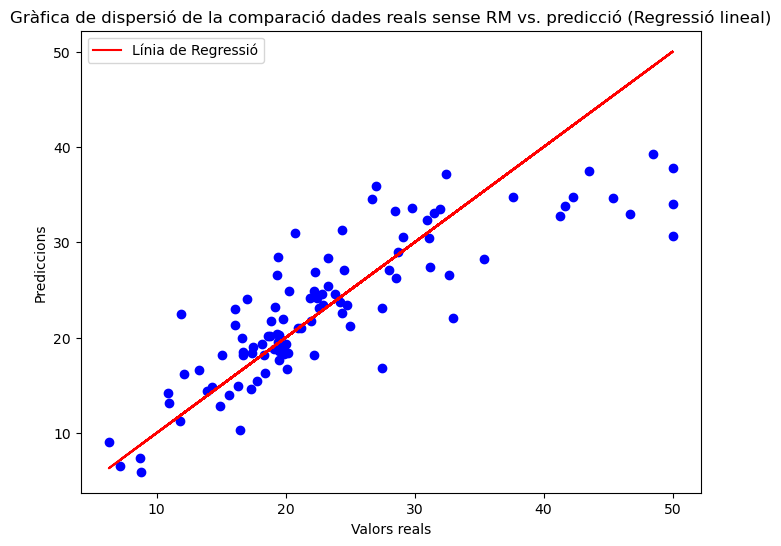

In [30]:
# Visualització del model

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_ml_RM, color='blue')
plt.plot(y_test, y_test, color='red', label='Línia de Regressió')
plt.xlabel('Valors reals')
plt.ylabel('Prediccions')
plt.title('Gràfica de dispersió de la comparació dades reals sense RM vs. predicció (Regressió lineal)')
plt.legend()

In [31]:
# Avaluació del model de regressió lineal

mse_RM = mean_squared_error(y_test, y_pred_ml_RM).round(3)
r2_RM = r2_score(y_test, y_pred_ml_RM).round(3)

print('Model de Regressió lineal')
print(f'MSE (Mean Squared Error): {mse_RM}')
print(f'R²: {r2_RM}')

Model de Regressió lineal
MSE (Mean Squared Error): 27.952
R²: 0.699


In [32]:
# Comparació de models

print(f'MSE: Lineal {mse} | Lineal sense RM {mse_RM}')
print(f'R²:  Lineal {r2}  | Lineal sense RM {r2_RM}')

MSE: Lineal 25.332 | Lineal sense RM 27.952
R²:  Lineal 0.727  | Lineal sense RM 0.699


El MSE per al model de regressió lineal amb RM és de 25.332, més baix que el del model sense RM. Pel que fa al R², aquest és un valor lleugerament superior al R² del model sense RM. Amb les dades que tenim, i seguint la informació que hem comentat als exercicis anteriors, el model amb RM sembla tenir un rendiment lleugerament millor.